In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)

In [173]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')
submit = pd.read_csv('sample_submission.csv')

In [174]:
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,type2,3.0,4,0.7516,1.8688,2.0,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,type2,4.0,3,-0.9612,-0.4537,2.0,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,type2,1.0,4,-0.9612,-0.4537,3.0,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,type2,1.0,3,-1.8176,-0.4537,NaN,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,type3,3.0,1,0.7516,-0.4537,2.0,2,8,2,0.1827


Text(0, 0.5, 'Counts')

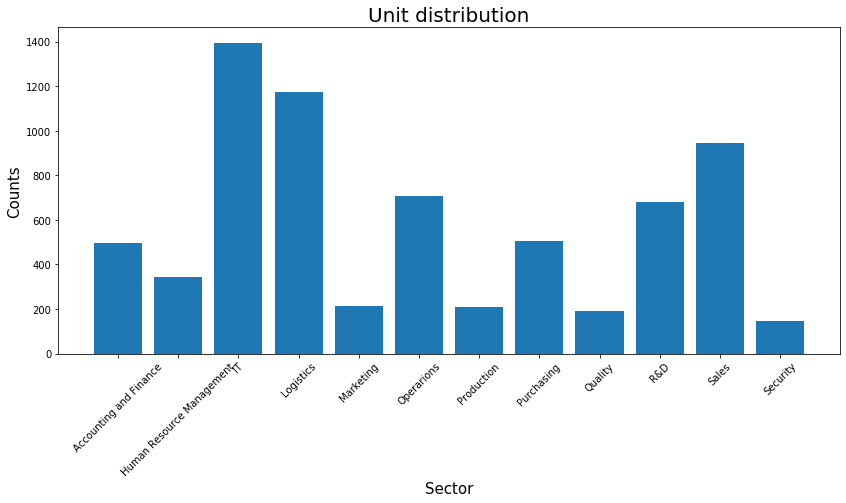

In [175]:
a = df_train.Unit.to_numpy()
unique, counts = np.unique(a, return_counts = True)
plt.figure(figsize = (14,6))

plt.bar(unique, counts)
plt.title('Unit distribution', size = 20)
plt.xlabel('Sector', size = 15)
plt.xticks(rotation = 45)
plt.ylabel('Counts', size = 15)

In [176]:
df_train.isnull().sum()

Employee_ID                    0
Gender                         0
Age                          412
Education_Level                0
Relationship_Status            0
Hometown                       0
Unit                           0
Decision_skill_possess         0
Time_of_service              144
Time_since_promotion           0
growth_rate                    0
Travel_Rate                    0
Post_Level                     0
Pay_Scale                      9
Compensation_and_Benefits      0
Work_Life_balance             11
VAR1                           0
VAR2                         577
VAR3                           0
VAR4                         656
VAR5                           0
VAR6                           0
VAR7                           0
Attrition_rate                 0
dtype: int64

In [177]:
df_train['VAR2'] = df_train['VAR2'].replace(np.NaN, df_train['VAR2'].mean())
df_train['VAR4'] = df_train['VAR4'].replace(np.NaN, df_train['VAR4'].mean())
df_train['Age'] = df_train['Age'].replace(np.NaN, df_train['Age'].mean())
df_train['Time_of_service'] = df_train['Time_of_service'].replace(np.NaN, df_train['Time_of_service'].mean())
df_train['Work_Life_balance'] = df_train['Work_Life_balance'].replace(np.NaN, df_train['Work_Life_balance'].mean())
df_train['Pay_Scale'] = df_train['Pay_Scale'].replace(np.NaN, df_train['Pay_Scale'].mean())

df_train.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
Attrition_rate               0
dtype: int64

In [178]:
df_test['VAR2'] = df_test['VAR2'].replace(np.NaN, df_test['VAR2'].mean())
df_test['VAR4'] = df_test['VAR4'].replace(np.NaN, df_test['VAR4'].mean())
df_test['Age'] = df_test['Age'].replace(np.NaN, df_test['Age'].mean())
df_test['Time_of_service'] = df_test['Time_of_service'].replace(np.NaN, df_test['Time_of_service'].mean())
df_test['Work_Life_balance'] = df_test['Work_Life_balance'].replace(np.NaN, df_test['Work_Life_balance'].mean())
df_test['Pay_Scale'] = df_test['Pay_Scale'].replace(np.NaN, df_test['Pay_Scale'].mean())


df_test.isnull().sum()

Employee_ID                  0
Gender                       0
Age                          0
Education_Level              0
Relationship_Status          0
Hometown                     0
Unit                         0
Decision_skill_possess       0
Time_of_service              0
Time_since_promotion         0
growth_rate                  0
Travel_Rate                  0
Post_Level                   0
Pay_Scale                    0
Compensation_and_Benefits    0
Work_Life_balance            0
VAR1                         0
VAR2                         0
VAR3                         0
VAR4                         0
VAR5                         0
VAR6                         0
VAR7                         0
dtype: int64

In [179]:
df_train.Compensation_and_Benefits = df_train.Compensation_and_Benefits.str[-1:]
df_train.Compensation_and_Benefits = df_train.Compensation_and_Benefits.astype(int)
df_train.Compensation_and_Benefits += 1

In [180]:
df_test.Compensation_and_Benefits = df_test.Compensation_and_Benefits.str[-1:]
df_test.Compensation_and_Benefits = df_test.Compensation_and_Benefits.astype(int)
df_test.Compensation_and_Benefits += 1

In [181]:
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,3,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,3,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,3,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,3,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,4,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827


# Dummies

In [113]:
df_train = pd.concat([df_train, pd.get_dummies(df_train.Gender, prefix = 'Gender')], axis = 1)
df_train = pd.concat([df_train, pd.get_dummies(df_train.Relationship_Status, prefix = 'Gender')], axis = 1)
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Gender_F,Gender_M,Gender_Married,Gender_Single
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,3,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841,1,0,1,0
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,3,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670,0,1,0,1
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,3,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851,1,0,1,0
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,3,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668,1,0,0,1
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,4,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827,1,0,1,0


In [90]:
#df_train = pd.concat([df_train, pd.get_dummies(df_train.Hometown, prefix = 'Gender', drop_first = True)], axis = 1)
#df_train = pd.concat([df_train, pd.get_dummies(df_train.Unit, prefix = 'Gender', drop_first = True)], axis = 1)
df_train.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Attrition_rate,Gender_F,Gender_M,Gender_Married,Gender_Single,Gender_Human Resource Management,Gender_IT,Gender_Logistics,Gender_Marketing,Gender_Operarions,Gender_Production,Gender_Purchasing,Gender_Quality,Gender_R&D,Gender_Sales,Gender_Security
0,EID_23371,F,42.0,4,Married,Franklin,IT,Conceptual,4.0,4,33,1,1,7.0,3,3.0,4,0.7516,1.8688,2.000000,4,5,3,0.1841,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0
1,EID_18000,M,24.0,3,Single,Springfield,Logistics,Analytical,5.0,4,36,0,3,6.0,3,4.0,3,-0.9612,-0.4537,2.000000,3,5,3,0.0670,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0
2,EID_3891,F,58.0,3,Married,Clinton,Quality,Conceptual,27.0,3,51,0,2,8.0,3,1.0,4,-0.9612,-0.4537,3.000000,3,8,3,0.0851,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0
3,EID_17492,F,26.0,3,Single,Lebanon,Human Resource Management,Behavioral,4.0,3,56,1,3,8.0,3,1.0,3,-1.8176,-0.4537,1.891078,3,7,3,0.0668,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0
4,EID_22534,F,31.0,1,Married,Springfield,Logistics,Conceptual,5.0,4,62,1,3,2.0,4,3.0,1,0.7516,-0.4537,2.000000,2,8,2,0.1827,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0


In [114]:
df_test = pd.concat([df_test, pd.get_dummies(df_test.Gender, prefix = 'Gender')], axis = 1)
df_test = pd.concat([df_test, pd.get_dummies(df_test.Relationship_Status, prefix = 'Gender')], axis = 1)
#df_test = pd.concat([df_test, pd.get_dummies(df_test.Hometown, prefix = 'Gender', drop_first = True)], axis = 1)
#df_test = pd.concat([df_test, pd.get_dummies(df_test.Unit, prefix = 'Gender', drop_first = True)], axis = 1)
df_test.head()

,Employee_ID,Gender,Age,Education_Level,Relationship_Status,Hometown,Unit,Decision_skill_possess,Time_of_service,Time_since_promotion,growth_rate,Travel_Rate,Post_Level,Pay_Scale,Compensation_and_Benefits,Work_Life_balance,VAR1,VAR2,VAR3,VAR4,VAR5,VAR6,VAR7,Gender_F,Gender_M,Gender_Married,Gender_Single
0,EID_22713,F,32.0,5,Single,Springfield,R&D,Conceptual,7.0,4,30,1,5,4.0,3,1.0,3,-0.9612,-0.4537,2.0,1,8,4,1,0,0,1
1,EID_9658,M,65.0,2,Single,Lebanon,IT,Directive,41.0,2,72,1,1,1.0,3,1.0,4,-0.9612,0.7075,1.0,2,8,2,0,1,0,1
2,EID_22203,M,52.0,3,Married,Springfield,Sales,Directive,21.0,3,25,0,1,8.0,4,1.0,4,-0.1048,0.7075,2.0,1,9,3,0,1,1,0
3,EID_7652,M,50.0,5,Single,Washington,Marketing,Analytical,11.0,4,28,1,1,2.0,1,4.0,3,-0.1048,0.7075,2.0,2,8,3,0,1,0,1
4,EID_6516,F,44.0,3,Married,Franklin,R&D,Conceptual,12.0,4,47,1,3,2.0,3,4.0,4,1.6081,0.7075,2.0,2,7,4,1,0,1,0


In [182]:
x_train = df_train.drop(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit','Age',
                        'Decision_skill_possess', 'Attrition_rate'], axis = 1).to_numpy()
print('X Trian shape:',x_train.shape)

x_test = df_test.drop(['Employee_ID', 'Gender', 'Relationship_Status', 'Hometown', 'Unit','Age',
                        'Decision_skill_possess'], axis = 1).to_numpy()

print('X Test shape:',x_test.shape)

y_train = df_train.Attrition_rate
print('Y Trian shape:',y_train.shape)

X Trian shape: (7000, 16)
X Test shape: (3000, 16)
Y Trian shape: (7000,)


In [135]:
x_train = df_train[['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']].to_numpy()
print('X Trian shape:',x_train.shape)

x_test = df_test[['VAR1', 'VAR2', 'VAR3', 'VAR4', 'VAR5', 'VAR6', 'VAR7']].to_numpy()

print('X Test shape:',x_test.shape)

y_train = df_train.Attrition_rate
print('Y Trian shape:',y_train.shape)

X Trian shape: (7000, 7)
X Test shape: (3000, 7)
Y Trian shape: (7000,)


# Linear Regression

In [136]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.metrics import mean_squared_error

model = LinearRegression()

model.fit(x_train, y_train)

LinearRegression()

In [137]:
# coefficeints of the trained model
print('\nCoefficient of model :', model.coef_)

# intercept of the model
print('\nIntercept of model',model.intercept_)


Coefficient of model : [-0.00173719 -0.00444446  0.00028452 -0.00463056 -0.00090687 -0.00045681
 -0.00307446]

Intercept of model 0.2193111076527212


In [138]:
y_pred = model.predict(x_train)
mean_squared_error(y_train, y_pred, squared = True)


0.034464590496623926

In [139]:
y_test = model.predict(x_test)
#values, counts = np.unique(y_test, return_counts=True)
#print(values, counts)

df_submit = pd.DataFrame(df_test['Employee_ID'], columns= submit.columns)
df_submit['Attrition_rate'] = y_test.tolist()
df_submit.to_csv('output.csv', index=False)
df_submit.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.192122
1,EID_9658,0.200588
2,EID_22203,0.189527
3,EID_7652,0.190814
4,EID_6516,0.178846


# XGBoost

In [196]:
import xgboost as xgb

data_dmatrix = xgb.DMatrix(data=x_train, label=y_train)

xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.8, learning_rate = 0.1,
                max_depth = 4, alpha = 1, n_estimators = 100)

xg_reg.fit(x_train,y_train)

[17:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:24:18] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(alpha=1, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.8, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.1, max_delta_step=0, max_depth=4,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=0, num_parallel_tree=1,
             objective='reg:linear', random_state=0, reg_alpha=1, reg_lambda=1,
             scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [197]:
y_pred = xg_reg.predict(x_train)
mean_squared_error(y_train, y_pred, squared = True)

0.03108419702667754

In [198]:
y_test = xg_reg.predict(x_test)
#values, counts = np.unique(y_test, return_counts=True)
#print(values, counts)

df_submit = pd.DataFrame(df_test['Employee_ID'], columns= submit.columns)
df_submit['Attrition_rate'] = y_test.tolist()
df_submit.to_csv('output.csv', index=False)
df_submit.head()

,Employee_ID,Attrition_rate
0,EID_22713,0.207687
1,EID_9658,0.195993
2,EID_22203,0.160457
3,EID_7652,0.203921
4,EID_6516,0.210922
